In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.spatial import distance_matrix

In [165]:
cities_q = pd.read_csv('Qatar.txt', sep=' ', names = ['lat','lon']).round()/1000
print(cities_q.head())
cc_q = cities_q.values

cities_l = pd.read_csv('Luxemburgo.txt', sep=' ', names = ['lat','lon']).round()/1000
print(cities_l.head())
cc_l = cities_l.values

cities_u = pd.read_csv('Uruguay.txt', sep=' ', names = ['lat','lon']).round()/-1000
print(cities_u.head())
cc_u = cities_u.values

      lat     lon
1  24.748  50.840
2  24.759  51.212
3  24.827  51.395
4  24.904  51.175
5  24.996  51.549
      lat    lon
1  49.526  5.941
2  49.526  5.941
3  49.739  6.345
4  49.608  6.406
5  49.797  6.156
      lat     lon
1 -30.133 -57.633
2 -30.167 -57.100
3 -30.233 -57.583
4 -30.250 -56.850
5 -30.250 -56.950


In [166]:
eps  = 0.17
margins = np.array([-eps, eps, -eps, eps])
bounds_q = np.array([cities_q['lon'].min(),cities_q['lon'].max(),cities_q['lat'].min(),cities_q['lat'].max()]).round(2)
bounds_l = np.array([cities_l['lon'].min(),cities_l['lon'].max(),cities_l['lat'].min(),cities_l['lat'].max()]).round(2)
bounds_u = np.array([cities_u['lon'].min(),cities_u['lon'].max(),cities_u['lat'].min(),cities_u['lat'].max()]).round(2)

bounds_q += margins
bounds_l += margins
bounds_u += margins


print(bounds_q)
print(bounds_l)
print(bounds_u)

[50.6  51.79 24.58 26.32]
[ 5.57  6.69 49.29 50.35]
[-58.59 -53.13 -35.14 -29.96]


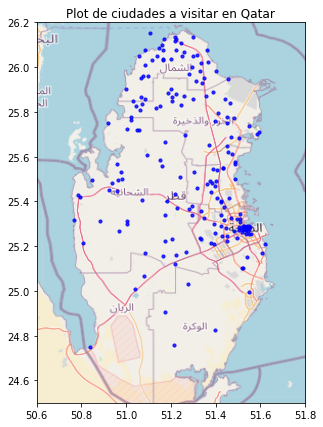

In [167]:
#QATAR
bounds_q = (50.6, 51.8,24.5,26.2)
qat = plt.imread("map_q.png")
fig_q, ax_q = plt.subplots(figsize = (8,7))
ax_q.scatter(cities_q.lon, cities_q.lat, zorder=1, alpha= 0.8, c='b', s=10)
ax_q.set_title('Plot de ciudades a visitar en Qatar')
ax_q.set_xlim(bounds_q[0],bounds_q[1])
ax_q.set_ylim(bounds_q[2],bounds_q[3])
ax_q.imshow(qat, zorder=0, extent = bounds, aspect= 'equal')
plt.savefig("qatar.png")


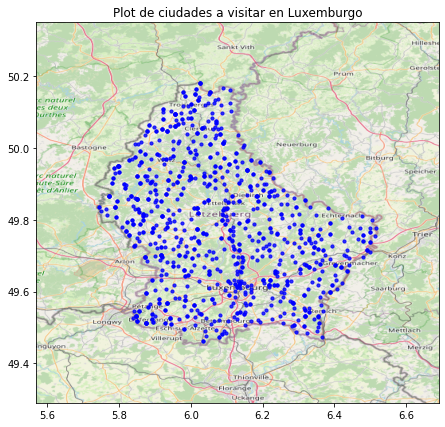

In [168]:
#Luxemburgo
lux = plt.imread("map_l.png")
fig_l, ax_l = plt.subplots(figsize = (8,7))
ax_l.scatter(cities_l.lon, cities_l.lat, zorder=1, alpha= 0.8, c='b', s=10)
ax_l.set_title('Plot de ciudades a visitar en Luxemburgo')
ax_l.set_ylim(bounds_l[2],bounds_l[3])
ax_l.set_xlim(bounds_l[0],bounds_l[1])
ax_l.imshow(lux, zorder=0, extent = bounds_l, aspect= 'equal')
plt.savefig("luxe.png")

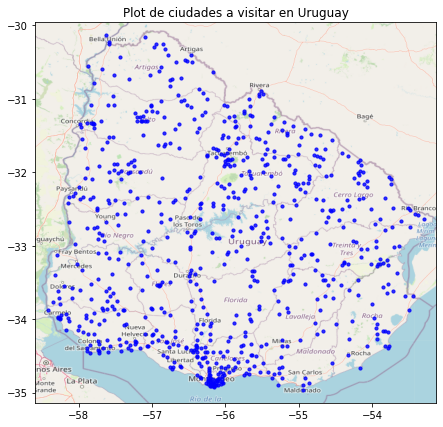

In [169]:
#Uruguay
uru = plt.imread("map_u.png")
fig_u, ax_u = plt.subplots(figsize = (8,7))
ax_u.scatter(cities_u.lon, cities_u.lat, zorder=1, alpha= 0.8, c='b', s=10)
ax_u.set_title('Plot de ciudades a visitar en Uruguay')
ax_u.set_ylim(bounds_u[2],bounds_u[3])
ax_u.set_xlim(bounds_u[0],bounds_u[1])
ax_u.imshow(uru, zorder=0, extent = bounds_u, aspect= 'equal')
plt.savefig("uru.png")

In [170]:
def nearest_n(cc):
    distances = distance_matrix(cc,cc)
    optimal_route = []
    optimal_dist = 1000000
    N = cc.shape[0]
    contador = 0
    for city_index in range(N):
        dist = 0
        not_visited = np.ones(N, dtype=bool)
        not_visited[city_index] = False
        sol = []
        sol.append(city_index) 
        if (sum(not_visited) > 0):
            dist = nearest_n2(city_index, not_visited, sol, dist, distances) 
        # print(city_index)
        # print(dist)
        # print()
        if dist < optimal_dist:
            optimal_dist = dist
            optimal_route = sol
    return [optimal_route, round(optimal_dist,6)]

def nearest_n2(city_index, not_visited ,sol, dist, distances):
    
    city_dist = distances[city_index]
    nn_dist = min(city_dist[not_visited])
    nn_indexes = np.where(city_dist == nn_dist)[0]
    if len(nn_indexes)>0:
        if len(nn_indexes)>1:
            flag = False
            i = 0
            while flag == False:
                if not_visited[nn_indexes[i]]:
                    nn_index = nn_indexes[i]
                    flag = True
                else:
                    i = i + 1
        else:
            nn_index = nn_indexes[0]
        not_visited[nn_index] = False
        sol.append(nn_index)
        dist = dist + nn_dist
        city_index = nn_index
        if sum(not_visited)>0:
            dist = nearest_n2(city_index, not_visited, sol, dist, distances)
        else:
            sol.append(sol[0])
            dist = dist + city_dist[sol[0]]
            return dist
    else:
        sol.append(sol[0])
        dist = dist + city_dist[sol[0]]
    return dist
    

start = time.time()
out_q = nearest_n(cc_q)
end = time.time()
time_q = end - start

start = time.time()
out_l = nearest_n(cc_l)
end = time.time()
time_l = end-start

start = time.time()
out_u = nearest_n(cc_u)
end = time.time()
time_u = end - start  




In [179]:
print("Resultados Qatar")
print("Ruta: ", out_q[0])
print("Distancia total: ", out_q[1])
print("Tiempo: ", round(time_q,4), " segundos")
print("Tiempo por iteración: ", round((time_q)/cc_q.shape[0],4)," segundos")
print()

print("Resultados Luxemburgo")
print("Ruta: ", out_l[0])
print("Distancia total: ", out_l[1])
print("Tiempo: ", round(time_l,4), " segundos")
print("Tiempo por iteración: ", round((time_l)/cc_l.shape[0],4)," segundos")
print()

print("Resultados Uruguay")
print("Ruta: ", out_u[0])
print("Distancia total: ", out_u[1])
print("Tiempo: ", round(time_u,4), " segundos")
print("Tiempo por iteración: ", round((time_u)/cc_u.shape[0],4)," segundos")

Resultados Qatar
Ruta:  [0, 5, 7, 15, 12, 13, 10, 16, 25, 23, 20, 17, 32, 27, 28, 21, 26, 36, 38, 46, 50, 57, 55, 52, 51, 47, 45, 40, 37, 42, 39, 33, 30, 31, 29, 34, 41, 48, 54, 49, 43, 53, 60, 66, 65, 72, 67, 63, 69, 76, 78, 80, 82, 87, 91, 94, 95, 92, 96, 104, 105, 106, 107, 109, 111, 114, 115, 116, 120, 119, 127, 122, 123, 132, 134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 149, 143, 153, 156, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131, 126, 124, 125, 113, 112, 108, 101, 102, 90, 77, 74, 71, 73, 68, 59, 56, 44, 83, 99, 117, 121, 118, 110, 103, 100, 98, 93, 89, 88, 81, 79, 86, 75, 70, 24, 22, 58, 61, 35, 62, 64, 84, 85, 97, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172, 174, 183, 180, 176, 177, 179, 169, 166, 167, 164, 158, 157, 161, 165, 170, 184, 192, 187, 190, 188, 191, 189, 186, 185, 182, 181, 175, 193, 159, 18, 14, 11, 9, 8, 4, 2, 1, 3, 6, 19, 0]
Distancia total:  11.622307
Tiempo:  25.9895  segundos
Tiempo por iteración:  0.1333  segundos

Resultados Luxem

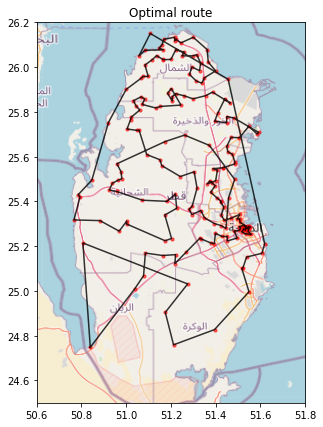

In [172]:
bounds = (50.6, 51.8,24.5,26.2)
qat = plt.imread("map_q.png")
fig_q, ax_q = plt.subplots(figsize = (8,7))
ax_q.scatter(cities_q.lon, cities_q.lat, zorder=1, alpha= 0.6, c='red', s=10)
route = out_q[0]
longs = cities_q.lon.values
lats = cities_q.lat.values
plotx=[]
ploty=[]
for p in route:
    plotx.append(longs[p])
    ploty.append(lats[p])

ax_q.plot(plotx,ploty, 'black', alpha=0.8)
ax_q.set_title('Optimal route')
ax_q.set_xlim(bounds[0],bounds[1])
ax_q.set_ylim(bounds[2],bounds[3])
ax_q.imshow(qat, zorder=0, extent = bounds, aspect= 'equal')
plt.savefig("qatar2.png")

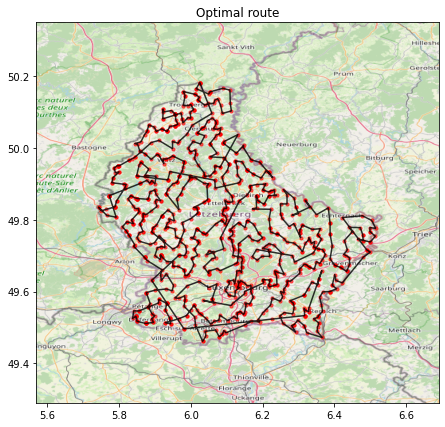

In [173]:
lux = plt.imread("map_l.png")
fig_l, ax_l = plt.subplots(figsize = (8,7))
ax_l.scatter(cities_l.lon, cities_l.lat, zorder=1, alpha= 0.6, c='r', s=10)
route = out_l[0]
longs = cities_l.lon.values
lats = cities_l.lat.values
plotx=[]
ploty=[]
for p in route:
    plotx.append(longs[p])
    ploty.append(lats[p])

ax_l.plot(plotx,ploty, 'black', alpha=.8)
ax_l.set_title('Optimal route')
ax_l.set_xlim(bounds_l[0],bounds_l[1])
ax_l.set_ylim(bounds_l[2],bounds_l[3])
ax_l.imshow(lux, zorder=0, extent = bounds_l, aspect= 'equal')
plt.savefig("lux2.png")



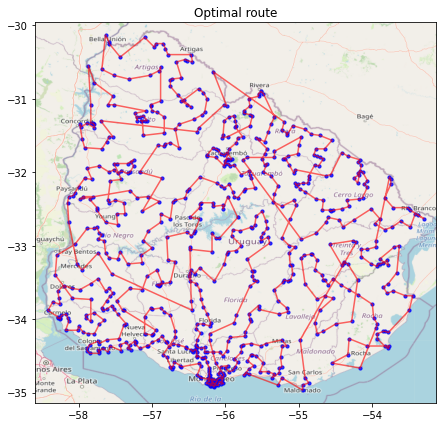

In [174]:
bounds = (50.6, 51.8,24.5,26.2)
qat = plt.imread("map_u.png")
fig_u, ax_u = plt.subplots(figsize = (8,7))
ax_u.scatter(cities_u.lon, cities_u.lat, zorder=1, alpha= 0.8, c='b', s=10)
route = out_u[0]
longs = cities_u.lon.values
lats = cities_u.lat.values
plotx=[]
ploty=[]
for p in route:
    plotx.append(longs[p])
    ploty.append(lats[p])

ax_u.plot(plotx,ploty, 'red', alpha=.6)
ax_u.set_title('Optimal route')
ax_u.set_xlim(bounds_u[0],bounds_u[1])
ax_u.set_ylim(bounds_u[2],bounds_u[3])
ax_u.imshow(uru, zorder=0, extent = bounds_u, aspect= 'equal')
plt.savefig("uru2.png")